<center><h1>Euclidean Distance (L2 Distance)</h1></center>
<br>
<div><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/dc0281a964ec758cca02ab9ef91a7f54ac00d4b7"></div>

In [19]:
import numpy as np
from PIL import Image
import os
import pylab as pl
%matplotlib inline

In [20]:
working_size = (50,37)

In [34]:
def convertimage(filename, size, verbose=False):
    img = Image.open(filename)
    img = img.resize(size)
    img = [list(img.getdata())]
    img = map(list, img)
    img = np.array(img)
    return img

In [35]:
 def separateRGB(image):
        red = [img[0] for img in image]
        green = [img[1] for img in image]
        blue = [img[2] for img in image]
        return red, green, blue

In [36]:
def main(verbose=False):
    root_path = os.path.abspath(os.path.dirname('__file__'))
    training_path = "/training/"
    test_path = "/test/"
    
    training_images = [root_path+training_path+train for train in os.listdir(root_path+training_path)]
    test_images = [root_path+test_path+test for test in os.listdir(root_path+test_path)]
    training_matrix = [convertimage(f, working_size, verbose) for f in training_images]   
    training_matrix = np.array(training_matrix)
    test_matrix = [convertimage(f, working_size, verbose) for f in test_images]
    test_matrix = np.array(test_matrix)
    
    l2distance = [np.sqrt(np.sum(np.square(np.subtract(test, train)))) for train, in training_matrix]
    
    
    print(l2distance)

[220, 220, 224, 222, 228, 229, 228, 230, 231, 231, 232, 232, 233, 235, 236, 238, 238, 238, 239, 245, 238, 244, 244, 249, 248, 249, 249, 249, 250, 244, 245, 245, 241, 241, 240, 238, 238, 236, 235, 235, 236, 232, 232, 229, 230, 229, 226, 225, 220, 218, 220, 221, 223, 225, 227, 229, 226, 228, 230, 230, 230, 231, 233, 233, 237, 237, 240, 238, 240, 240, 242, 245, 246, 245, 247, 248, 248, 248, 247, 245, 244, 242, 239, 242, 237, 242, 237, 235, 238, 235, 236, 233, 232, 229, 230, 229, 227, 222, 221, 223, 224, 221, 223, 226, 227, 230, 230, 230, 230, 232, 230, 234, 236, 235, 236, 234, 237, 239, 239, 239, 244, 240, 243, 243, 245, 246, 244, 243, 241, 242, 245, 241, 241, 239, 239, 236, 238, 234, 236, 232, 233, 233, 229, 226, 229, 229, 228, 222, 223, 223, 220, 222, 225, 224, 225, 226, 229, 228, 230, 231, 231, 232, 234, 235, 234, 234, 235, 238, 240, 239, 240, 240, 242, 241, 244, 244, 241, 243, 240, 237, 240, 239, 239, 235, 238, 236, 236, 235, 233, 231, 229, 231, 230, 227, 227, 225, 225, 224, 220, 218,

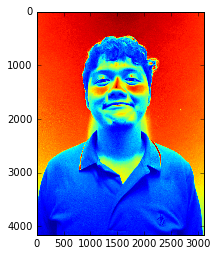

In [37]:
if __name__ == '__main__':
    main(True)

In [ ]:
np.square([2,3])

In [33]:
l2distance = np.sqrt(np.sum(np.square(np.subtract(np.array([3,3]), np.array([5,4])))))
l2distance

2.2360679774997898